**DATA CLEANING**

**1) Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**2) Load Data**

In [5]:
df = pd.read_csv("/content/credit_card_approvals_uncleaned.csv")

**3) Check basic info**

In [6]:
df.head(10)

,ID,Age,Gender,Income,Employment_Status,Marital_Status,Education_Level,Credit_Score,Loan_Default,Credit_Cards_Held,Annual_Expenses,Num_Bank_Accounts,Region,Approved,Application_Date
0,CUST1000,55.0,Female,90559.0,NaN,Single,NaN,480.0,NaN,7.0,10622.0,2.0,East,NaN,2022-12-29
1,CUST1001,68.0,Female,137015.0,NaN,Divorced,NaN,598.0,NaN,5.0,62174.0,0.0,North,NaN,2023-05-30
2,CUST1002,45.0,Female,55648.0,Student,Divorced,NaN,764.0,Yes,0.0,34265.0,2.0,East,Yes,2023-03-26
3,CUST1003,31.0,Other,51873.0,Self-employed,Single,Bachelor,372.0,NaN,6.0,50349.0,2.0,North,NaN,2022-10-11
4,CUST1004,59.0,Male,130307.0,NaN,NaN,NaN,744.0,NaN,5.0,77095.0,1.0,NaN,Yes,2023-09-27
5,CUST1005,24.0,NaN,132720.0,NaN,Widowed,Bachelor,700.0,No,6.0,76916.0,4.0,NaN,Yes,2022-04-16
6,CUST1006,37.0,Female,94976.0,Student,Single,NaN,571.0,NaN,1.0,47598.0,1.0,NaN,NaN,2022-11-21
7,CUST1007,55.0,NaN,133618.0,Student,NaN,NaN,776.0,NaN,5.0,61827.0,5.0,West,NaN,2022-12-01
8,CUST1008,35.0,Female,30581.0,Employed,Single,Bachelor,478.0,NaN,8.0,92924.0,2.0,West,NaN,2022-05-22
9,CUST1009,39.0,NaN,115947.0,Employed,Single,PhD,425.0,NaN,7.0,39159.0,0.0,West,NaN,2023-09-19


In [7]:
df.tail()

,ID,Age,Gender,Income,Employment_Status,Marital_Status,Education_Level,Credit_Score,Loan_Default,Credit_Cards_Held,Annual_Expenses,Num_Bank_Accounts,Region,Approved,Application_Date
595,CUST1595,33.0,NaN,138386.0,Unemployed,Married,PhD,839.0,No,4.0,62174.0,NaN,East,NaN,2023-09-22
596,CUST1596,42.0,Male,142596.0,NaN,Divorced,Bachelor,735.0,NaN,9.0,7841.0,3.0,North,Yes,2022-12-04
597,CUST1597,24.0,Male,72768.0,Self-employed,Married,NaN,713.0,NaN,5.0,98309.0,1.0,NaN,No,2022-04-07
598,CUST1598,45.0,NaN,106731.0,Unemployed,NaN,NaN,565.0,NaN,7.0,10033.0,0.0,East,NaN,2021-01-12
599,CUST1599,42.0,Male,120616.0,NaN,Divorced,NaN,396.0,NaN,4.0,35232.0,3.0,NaN,NaN,2022-04-22


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 600 non-null    object 
 1   Age                586 non-null    float64
 2   Gender             359 non-null    object 
 3   Income             597 non-null    float64
 4   Employment_Status  385 non-null    object 
 5   Marital_Status     408 non-null    object 
 6   Education_Level    395 non-null    object 
 7   Credit_Score       600 non-null    float64
 8   Loan_Default       293 non-null    object 
 9   Credit_Cards_Held  558 non-null    float64
 10  Annual_Expenses    597 non-null    float64
 11  Num_Bank_Accounts  528 non-null    float64
 12  Region             401 non-null    object 
 13  Approved           325 non-null    object 
 14  Application_Date   600 non-null    object 
dtypes: float64(6), object(9)
memory usage: 70.4+ KB


In [9]:
df.shape

(600, 15)

In [10]:
df.describe()

,Age,Income,Credit_Score,Credit_Cards_Held,Annual_Expenses,Num_Bank_Accounts
count,586.000000,597.000000,600.000000,558.000000,597.000000,528.000000
mean,44.262799,82272.028476,580.206667,4.602151,51467.618090,2.435606
std,14.906175,40046.852960,157.453867,2.899786,27402.881213,1.718197
min,18.000000,10526.000000,305.000000,0.000000,5066.000000,0.000000
25%,32.000000,48709.000000,436.000000,2.000000,27092.000000,1.000000
50%,45.000000,79626.000000,588.000000,4.000000,52645.000000,2.000000
75%,56.000000,116896.000000,713.000000,7.000000,75714.000000,4.000000
max,69.000000,149892.000000,849.000000,9.000000,99658.000000,5.000000


In [11]:
df.describe(include='object')

,ID,Gender,Employment_Status,Marital_Status,Education_Level,Loan_Default,Region,Approved,Application_Date
count,600,359,385,408,395,293,401,325,600
unique,600,3,4,4,4,2,4,2,470
top,CUST1599,Male,Student,Single,PhD,Yes,South,No,2022-01-31
freq,1,130,112,110,103,150,107,166,5


**4) Handle Missing Values**

In [12]:
# Replace empty strings with NaN for categorical columns

df.replace("",np.nan, inplace=True)

In [13]:
# Fill numerical columns
#   a) Median for continuous numeric values
#   b) Mode for discrete numeric values

df['Age'].fillna(df['Age'].median(),inplace=True)
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].median(),inplace=True)
df['Credit_Cards_Held'].fillna(df['Credit_Cards_Held'].mode()[0],inplace=True)
df['Annual_Expenses'].fillna(df['Annual_Expenses'].median(),inplace=True)
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mode()[0],inplace=True)

/tmp/ipython-input-2988094320.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-2988094320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [14]:
# Fill categorical columns with "Unknown"

cat_cols = ['Gender','Employment_Status','Marital_Status','Education_Level','Loan_Default','Region','Approved']

for col in cat_cols:
  df[col].fillna("Unknown",inplace=True)

/tmp/ipython-input-1008996129.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown",inplace=True)


**5) Remove Duplicates**

In [15]:
df.drop_duplicates(inplace=True)

**6) Convert Data Types**

In [16]:
df['Application_Date']=pd.to_datetime(df['Application_Date'])

**7) Final Missing Value check**

In [17]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Income,0
Employment_Status,0
Marital_Status,0
Education_Level,0
Credit_Score,0
Loan_Default,0
Credit_Cards_Held,0


**EDA - Exploratory Data Analysis**

**1) Overview of target Variable**

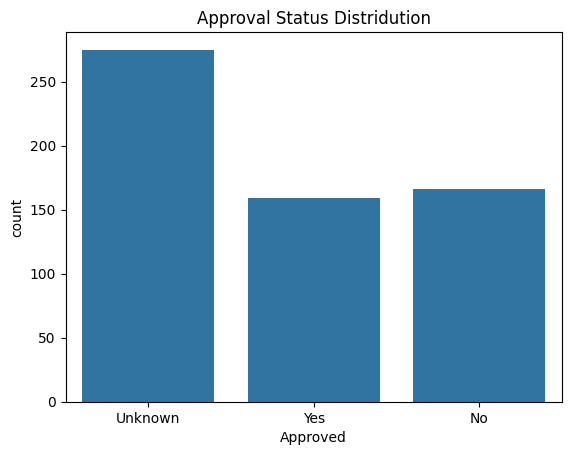

In [18]:
sns.countplot(x='Approved',data=df)
plt.title("Approval Status Distridution")
plt.show()

**2) Categorical Variables Distribution**

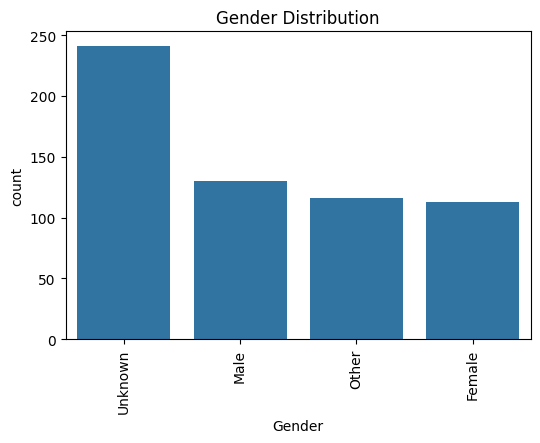

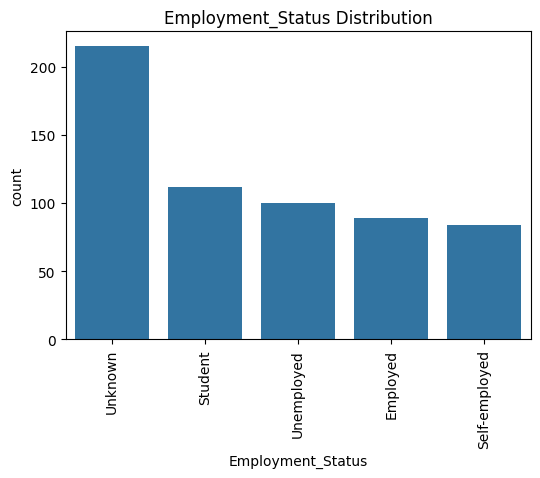

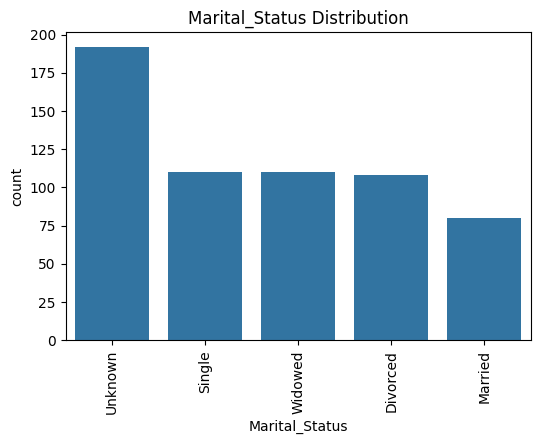

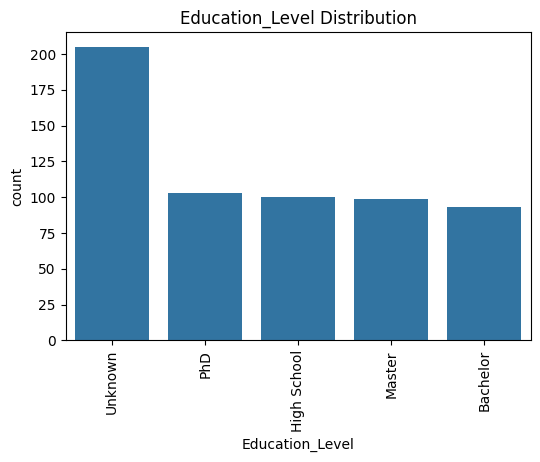

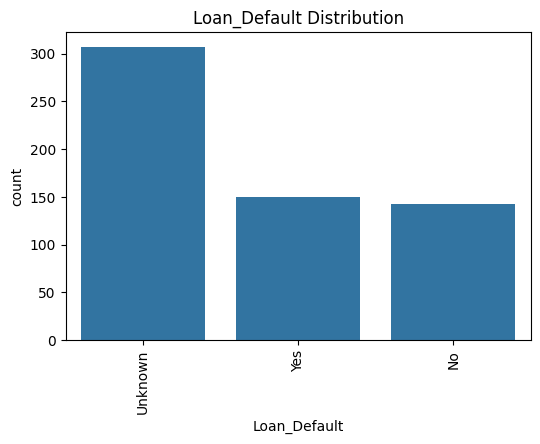

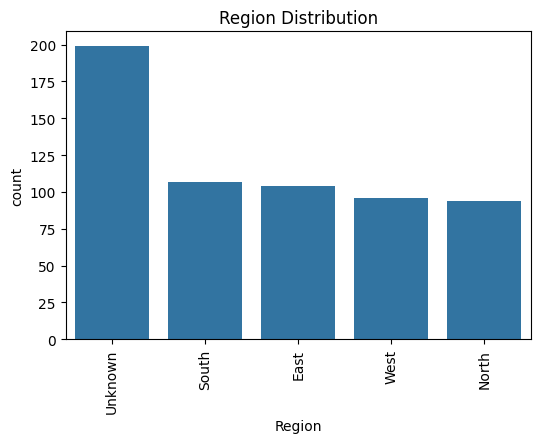

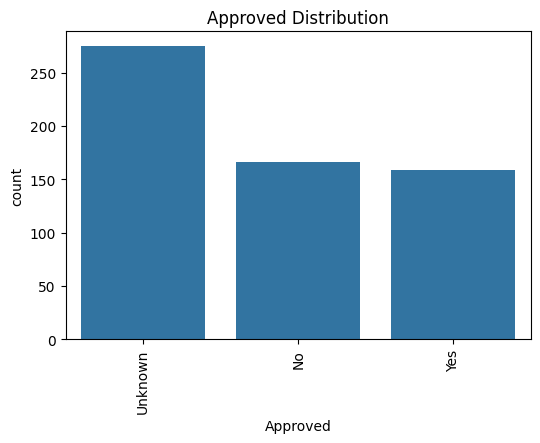

In [20]:
for col in cat_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  plt.title(f"{col} Distribution")
  plt.xticks(rotation=90)
  plt.show()

**3) Numerical Variables Distribution**

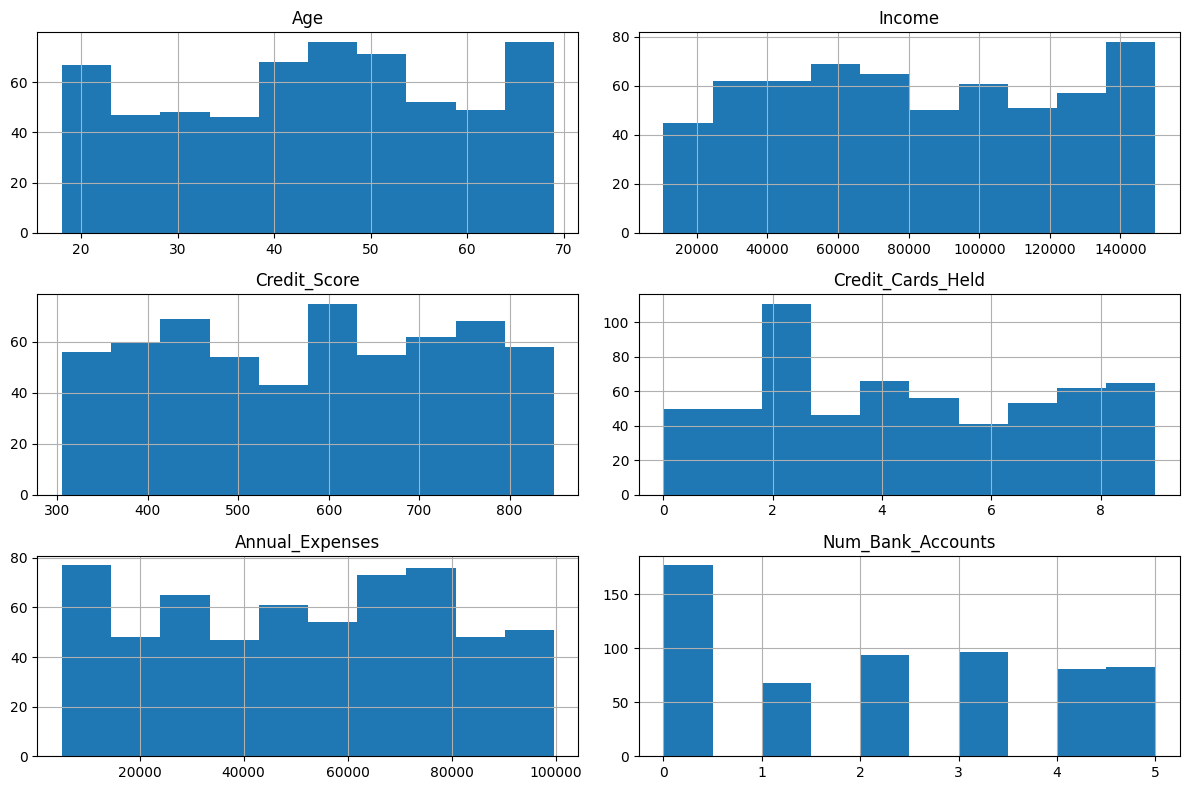

In [21]:
num_cols = ['Age','Income','Credit_Score','Credit_Cards_Held','Annual_Expenses','Num_Bank_Accounts']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

**4) Outlier Detection**

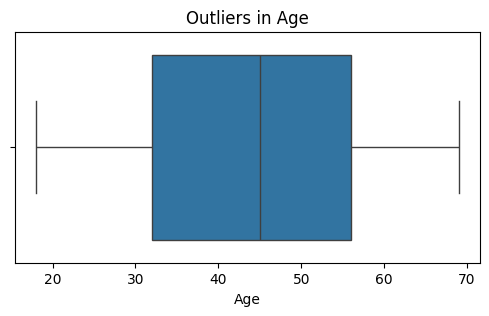

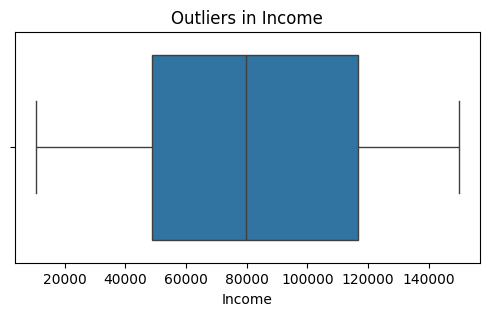

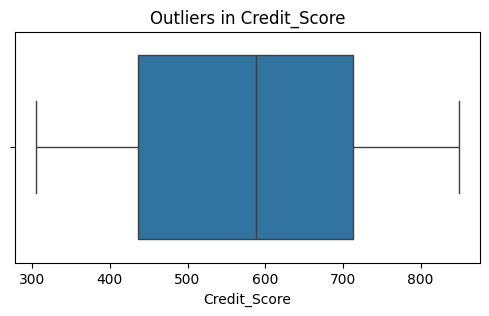

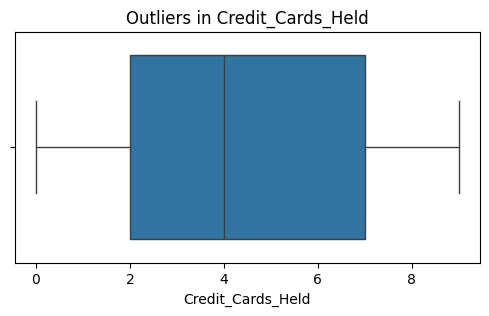

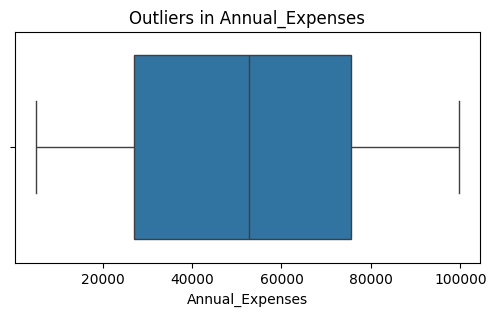

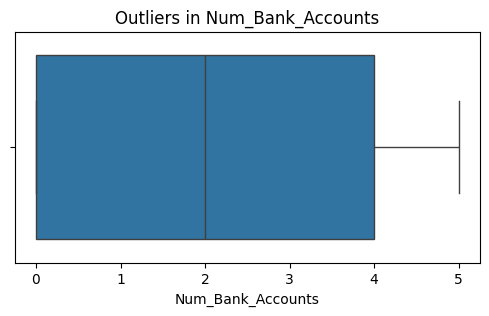

In [22]:
for col in num_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df[col])
  plt.title(f"Outliers in {col}")
  plt.show()

**5) Correlation Analysis**

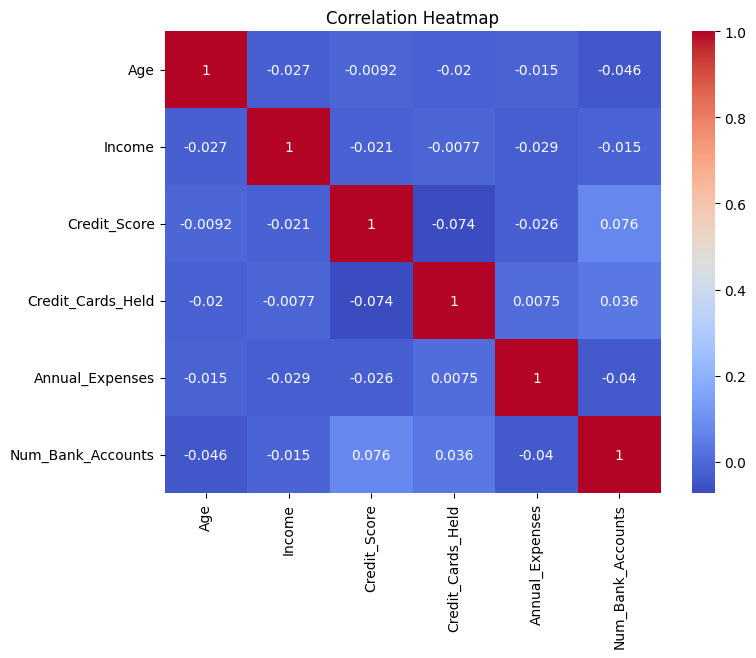

In [23]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**6) Feature vs Target Relationship**

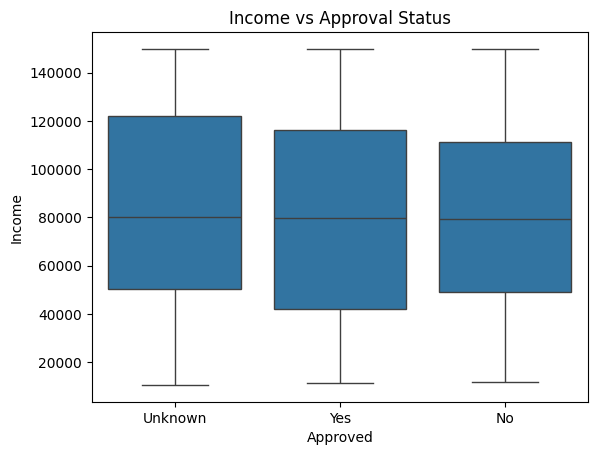

In [24]:
# Income vs Approval

sns.boxplot(x='Approved', y='Income', data=df)
plt.title("Income vs Approval Status")
plt.show()

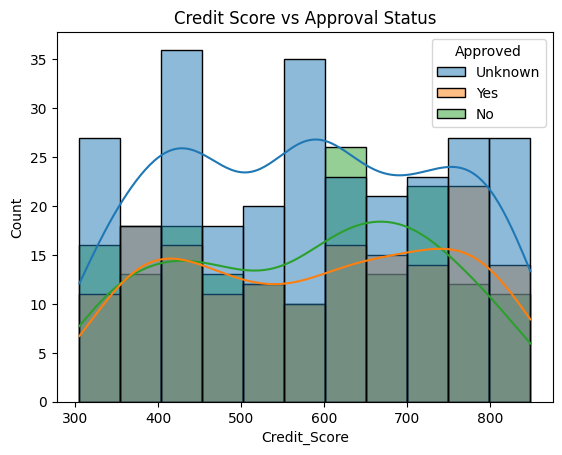

In [25]:
# Credit_Score vs Approval

sns.histplot(data=df, x="Credit_Score", hue="Approved", kde=True)
plt.title("Credit Score vs Approval Status")
plt.show()

**SAVE THE CLEANED DATA**

In [26]:
df.to_csv("credit_card_approvals_cleaned.csv", index=False)

In [27]:
# To download it
from google.colab import files
files.download("credit_card_approvals_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>